In [1]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import kruskal

In [2]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105, None]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
df = pd.DataFrame({'Piter': petersburg, 'Magadan': magadan})
df.head(3)

,Piter,Magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781


# 1. Проверим данные на нормальность

In [3]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
alpha = 0.05

array([[<AxesSubplot: title={'center': 'Piter'}>,
        <AxesSubplot: title={'center': 'Magadan'}>]], dtype=object)

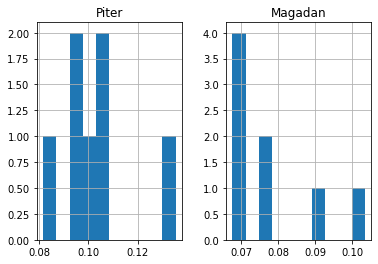

In [4]:
df.hist()

### Визуально видно, что данные по Петербургу распределены близко к нормальному, по Магадану же распределение не нормально. Сделаем расчеты

# * Данные по Петербургу

Тест Шапиро

In [5]:
_, p = shapiro(df[df['Piter'].notna()]['Piter'])
print('p=%.3f' % p)

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.242
Данные распределены нормально


# * Данные Магадaна

Тест Шапиро

In [6]:
_, p = shapiro(df.Magadan)
print('p=%.3f' % p)

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.036
Данные не распределены нормально (мы отвергаем H0)


Тест Д'Агостино

In [7]:
_, p = normaltest(df['Magadan'])

print('p=%.3f' % p)

if p > alpha:
	print(H0)
else:
    print(Ha)

p=0.154
Данные распределены нормально


c:\Users\Администратор.000\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Тест Д'Агостино и Шапиро по Магадану показали разные результаты. Вопрос: Это правильно, нет ли здесь у меня ошибки? Если правильно, как в таком случае поступать? Все-таки основываясь на визуальном представлении, что данные по Магадану распределены не нормально, далее использую непараметрические тесты.

# Корреляция Спирмена

In [8]:
from scipy.stats import spearmanr

corr, p = spearmanr(df[df['Piter'].notna()]['Piter'], df['Magadan'][:-1])
print(corr)

if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.14285714285714288
0.7599453002180929 > 0.05. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.


# Тест Краскела-Уоллиса

In [9]:
H0 = 'Медианный размер мидий Питера и Магадана одинаков'
Ha = 'Есть значимая разница между медианным размером Питерских и Магаданских мидий'

In [10]:
test_results = kruskal(df[df['Piter'].notna()]['Piter'], df.Magadan)

p = round(test_results[1],2)

if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.01 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между медианным размером Питерских и Магаданских мидий


# ВЫВОД: Корреляция между размерами Питерских и Магаданских мидий отсутствует, при этом разница между размерами мидий существенная.